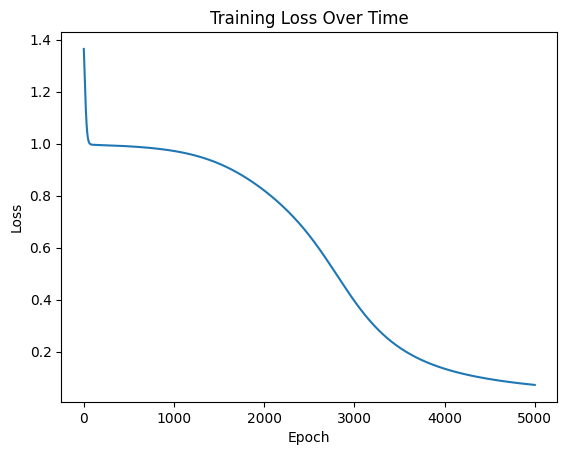

shape: 4
Input: [[0 0]], Prediction: [[0.17389991]]
Input: [[0 1]], Prediction: [[0.87481648]]
Input: [[1 0]], Prediction: [[0.87474287]]
Input: [[1 1]], Prediction: [[0.10490341]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the Neural Network for XOR
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.theta1 = np.random.rand(hidden_size, input_size)
        self.theta2 = np.random.rand(output_size, hidden_size)
        np.random.seed(314)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_run(self, input):
        z1 = np.dot(self.theta1, input)
        a1 = self.sigmoid(z1)
        z2 = np.dot(self.theta2, a1)
        a2 = self.sigmoid(z2)
        return a2, a1

    def back_propagate(self, input, output, a2, a1, learning_rate):
        error = a2 - output
        delta2 = error * self.sigmoid_derivative(a2)
        d_theta2 = np.dot(delta2, a1.T)

        delta1 = np.dot(self.theta2.T, delta2) * self.sigmoid_derivative(a1)
        d_theta1 = np.dot(delta1, input.T)

        return d_theta2, d_theta1

# XOR Training Data
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
outputs = np.array([0, 1, 1, 0])

# Network Parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1
epochs = 5000

# Initialize and Train the Network
nn = NeuralNetwork(input_size, hidden_size, output_size)


losses = []
for epoch in range(epochs):
    a2, a1 = nn.forward_run(inputs)
    d_theta2, d_theta1 = nn.back_propagate(inputs, outputs, a2, a1, learning_rate)
    nn.theta2 -= learning_rate * d_theta2
    nn.theta1 -= learning_rate * d_theta1
    loss = np.sum((outputs - a2) ** 2)
    losses.append(loss)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

# Testing the Neural Network
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
print(f"shape: {test_inputs.shape[1]}")
for i in range(test_inputs.shape[1]):
    input = test_inputs[:, [i]]
    prediction = nn.forward_run(input)
    print(f"Input: {test_inputs[:, [i]].T}, Prediction: {prediction[0]}")

